<a href="https://colab.research.google.com/github/WaterStoreRemark/Ahn_Jaysang/blob/main/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center"><img width="50%" src="https://aimodelsharecontent.s3.amazonaws.com/aimodshare_banner.jpg" /></p>


---

## Homework1

In [1]:
#install aimodelshare library
! pip install aimodelshare --upgrade

     |████████████████████████████████| 131 kB 2.7 MB/s 
     |████████████████████████████████| 22.3 MB 3.8 MB/s 
     |████████████████████████████████| 435 kB 10.8 MB/s 
     |████████████████████████████████| 127 kB 42.9 MB/s 
     |████████████████████████████████| 12.7 MB 40.7 MB/s 
     |████████████████████████████████| 78 kB 6.2 MB/s 
     |████████████████████████████████| 273 kB 48.2 MB/s 
     |████████████████████████████████| 178 kB 44.5 MB/s 
     |████████████████████████████████| 131 kB 40.7 MB/s 
     |████████████████████████████████| 4.9 MB 29.9 MB/s 
     |████████████████████████████████| 300 kB 45.5 MB/s 
     |████████████████████████████████| 96 kB 3.2 MB/s 
     |████████████████████████████████| 146 kB 48.5 MB/s 
     |████████████████████████████████| 7.7 MB 24.3 MB/s 
     |████████████████████████████████| 79 kB 7.6 MB/s 
     |████████████████████████████████| 53 kB 1.2 MB/s 
     |████████████████████████████████| 87 kB 6.3 MB/s 
     |██████████████████

## Then, we load the dataset.

In [7]:
# Get the dataset
from aimodelshare import download_data
download_data('public.ecr.aws/y2e2a1d6/world_happiness_competition_data-repository:latest') 



Data downloaded successfully.


##2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [33]:
# Load the dataset
import pandas as pd
X_train = pd.read_csv('world_happiness_competition_data/X_train.csv')
X_test = pd.read_csv('world_happiness_competition_data/X_test.csv')
y_train = pd.read_csv('world_happiness_competition_data/y_train.csv')
y_train_labels = y_train.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Saudi Arabia,1.403,1.357,0.795,0.439,0.080,0.132,Saudi Arabia,Asia,Western Asia,173.000000
1,Georgia,0.886,0.666,0.752,0.346,0.043,0.164,Georgia,Asia,Western Asia,18.000000
2,Guinea,0.380,0.829,0.375,0.332,0.207,0.086,Guinea,Africa,Sub-Saharan Africa,3.000000
3,Lithuania,1.238,1.515,0.818,0.291,0.043,0.042,Lithuania,Europe,Northern Europe,125.611111
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,1.000000


In [54]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(Y_train)

NameError: ignored

# Question 2: Using a Jupyter notebook, write a report on World Happiness data with the following information:

##  Explore bivariate results (Use visualizations!) -- Describe any relationships you see between particular features and the target variable

In [34]:
## First, we wish to combine X_data and X_train data into one dataset to get the full picture

X_data = X_train.append(X_test)
X_data.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Saudi Arabia,1.403,1.357,0.795,0.439,0.080,0.132,Saudi Arabia,Asia,Western Asia,173.000000
1,Georgia,0.886,0.666,0.752,0.346,0.043,0.164,Georgia,Asia,Western Asia,18.000000
2,Guinea,0.380,0.829,0.375,0.332,0.207,0.086,Guinea,Africa,Sub-Saharan Africa,3.000000
3,Lithuania,1.238,1.515,0.818,0.291,0.043,0.042,Lithuania,Europe,Northern Europe,125.611111
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,Netherlands,Europe,Western Europe,1.000000


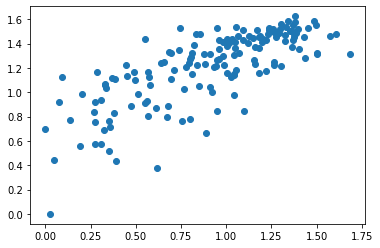

In [26]:
## Then, we compare two variables: GDP per capita and Social support and explore their bivariate results

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(X_data[["GDP per capita"]], X_data[["Social support"]])



**Answer:** We can see from the graph above that as GDP per capita increases, the Social Support generally increases as well. This makes sense, since higher GPD per capita means the country is that much richer, which means it has more budget to spend on Social Support, something that a good society needs.

## Examine features that predict happiness categories using one or more models that allow for automatic feature selection. -- Explain any meaningful findings

In [28]:
## I will be using Recursive Feature Elimination to to find catgories to predict happiness by automatic feature selection.

## First, I set it up.

from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostRegressor
from numpy import array


In [81]:
## I'm going to drop the categorical varaibles so that only the numerical ones remain

X_train2 = X_train.drop('Country or region', 1)
X_train2 = X_train2.drop('name', 1)
X_train2 = X_train2.drop('region', 1)
X_train2 = X_train2.drop('sub-region', 1)

X_train2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Terrorist_attacks
0,1.403,1.357,0.795,0.439,0.080,0.132,173.000000
1,0.886,0.666,0.752,0.346,0.043,0.164,18.000000
2,0.380,0.829,0.375,0.332,0.207,0.086,3.000000
3,1.238,1.515,0.818,0.291,0.043,0.042,125.611111
4,1.396,1.522,0.999,0.557,0.322,0.298,1.000000


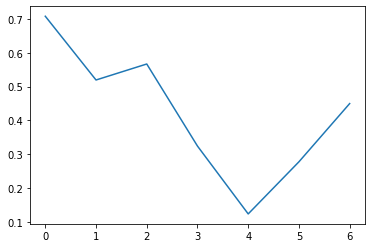

In [86]:
from sklearn.feature_selection import mutual_info_classif
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(X_train2,y_train_labels)
feat_importances =pd.Series(importances)
feat_importances.plot()
plt.show()

*Answer:* Based on the graph above, we can see that the model is best done when using four variables instead of the entire six.

## Run at least three prediction models to try to predict World Happiness well. -- Discuss which models performed better and point out relevant hyper-parameter values for successful models.

In [178]:
## First, we edit the dataset even further

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# We create the preprocessing pipelines for both numeric and categorical data.

numeric_features = X_train.drop(['Country or region', 'name', 'region', 'sub-region'], axis=1)
numeric_features=numeric_features.columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region', 'sub-region']

#Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#Fit your preprocessor object
preprocess=preprocessor.fit(X_train) 

In [179]:
# Write function to transform data with preprocessor

def preprocessor(data):
    data.drop(['Country or region', 'name'], axis=1)
    preprocessed_data=preprocess.transform(data)
    return preprocessed_data

In [180]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(104, 26)

In [181]:
## Model 1

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500, max_depth=2)
model.fit(preprocessor(X_train), y_train_labels) # Fitting to the training set.
model.score(preprocessor(X_train), y_train_labels) # Fit score, 0-1 scale.

0.7307692307692307

In [182]:
## Model 2 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier


model2 = BaggingClassifier( n_estimators = 3)
model2.fit(preprocessor(X_train), y_train_labels) 
model2.score(preprocessor(X_train), y_train_labels) 





0.9038461538461539

In [185]:
## Model 3 

from sklearn.ensemble import RandomForestClassifier

model3 = RandomForestClassifier(n_estimators=400, max_depth=5)
model3.fit(preprocessor(X_train), y_train_labels) 
model3.score(preprocessor(X_train), y_train_labels) 



0.9519230769230769

**Answer:** Out of the 3 Models that I created, Model 3 had the highest score, meaning that it was the most accurate. The reason being is the optimal hyper parameters, which are n_estimators and max_depth in this case.

## Submit your best model to the leader board for the World Happiness AI Model Share competition created for this class. Remember to use the instructions on the World Happiness Model Submission Guide notebook, including the specific code to load your train and tests sets.

In [162]:
#Let's first login to aimodelshare

from aimodelshare.aws import set_credentials

#This is the unique rest api that powers this World Happiness Classification Playground -- make sure to update the apiurl for new competition deployments
apiurl="https://owf2d4c45b.execute-api.us-east-1.amazonaws.com/prod/m"

set_credentials(apiurl=apiurl)

AI Modelshare Username:··········
AI Modelshare Password:··········
AI Model Share login credentials set successfully.


#### Save model to local ".onnx" file

In [186]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

# Check how many preprocessed input features are there?
from skl2onnx.common.data_types import FloatTensorType

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  #Insert correct number of preprocessed features

onnx_model = model_to_onnx(model, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

#### Save preprocessor function to local "preprocessor.zip" file

In [187]:
import aimodelshare as ai
ai.export_preprocessor(preprocessor,"") 

Your preprocessor is now saved to 'preprocessor.zip'


In [188]:
#Instantiate Competition
import aimodelshare as ai
mycompetition= ai.Competition(apiurl)

In [189]:
#Submit Model 1: 

#-- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

# Submit Model 1 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model.onnx",
                                 preprocessor_filepath="preprocessor.zip",
                                 prediction_submission=prediction_labels)

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 75

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1283


In [175]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model2, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model2.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [176]:
#Submit Model 2: 

#-- Generate predicted y values (Model 2)
prediction_labels = model2.predict(preprocessor(X_test))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model2.onnx",
                                 prediction_submission=prediction_labels,
                                 preprocessor_filepath="preprocessor.zip")

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 74

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1283


## 4. Generate predictions from X_test data and submit model to competition


In [191]:
# Save sklearn model to local ONNX file
from aimodelshare.aimsonnx import model_to_onnx

feature_count=preprocessor(X_test).shape[1] #Get count of preprocessed features
initial_type = [('float_input', FloatTensorType([None, feature_count]))]  # Insert correct number of preprocessed features

onnx_model = model_to_onnx(model3, framework='sklearn',
                          initial_types=initial_type,
                          transfer_learning=False,
                          deep_learning=False)

with open("model3.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

In [192]:
#Submit Model 3: 

#-- Generate predicted y values (Model 3)
prediction_labels = model2.predict(preprocessor(X_test))

# Submit Model 2 to Competition Leaderboard
mycompetition.submit_model(model_filepath = "model3.onnx",
                                 prediction_submission=prediction_labels,
                                 preprocessor_filepath="preprocessor.zip")

Insert search tags to help users find your model (optional): 
Provide any useful notes about your model (optional): 

Your model has been submitted as model version 76

To submit code used to create this model or to view current leaderboard navigate to Model Playground: 

 https://www.modelshare.org/detail/model:1283
